In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing important files....
import io
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from xgboost import XGBRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from statistics import mean, stdev
from sklearn import tree
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA




In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Research Work/Research work 2/DATASET.csv')


In [ ]:
feature_name=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']
_#Defining features(X) and labels(Y)....
X = df.drop(['Status','Recording','ID',],axis =1).values
y = df['Status'].values



In [ ]:
#Checking is any nan value available or not
np.any(np.isnan(X))

False

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_scaled.shape

(240, 45)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y== 0)))

Before OverSampling, counts of label '1': 147
Before OverSampling, counts of label '0': 48 



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(X_scaled, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X: (294, 22)
After OverSampling, the shape of train_y: (294,) 

After OverSampling, counts of label '1': 147
After OverSampling, counts of label '0': 147


In [ ]:
components=30
pca = PCA(n_components = components)

X_modified = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.51037436, 0.1683358 , 0.05612897, 0.04559851, 0.03201655,
       0.02079377, 0.01875739, 0.01281553, 0.01193418, 0.01003854,
       0.00925069, 0.00852237, 0.00816487, 0.00782605, 0.00683186,
       0.00635801, 0.0058967 , 0.00559592, 0.00525697, 0.00483943,
       0.00457121, 0.00409783, 0.00395004, 0.0038323 , 0.00365744,
       0.00335336, 0.00292641, 0.00276467, 0.00256911, 0.00245229])

In [ ]:
X_modified.shape

(240, 10)

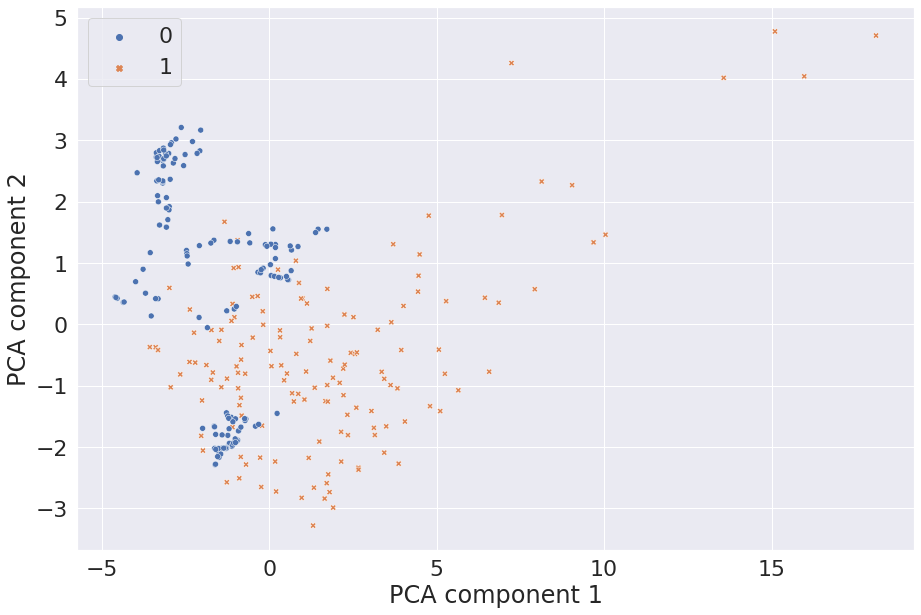

In [ ]:
fig=plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
labels=['Healthy','PD']
plt.xlabel('PCA component 1')
#Set y-axis label
plt.ylabel('PCA component 2')
sns.scatterplot(data=X_modified, x=X_modified[:,0], y=X_modified[:,1], hue=y_res, style=y_res)
plt.savefig('2D data visualization.png')

In [ ]:
components=14
pca = PCA(n_components = components)
X_modified = pca.fit_transform(X_res)

In [ ]:
#Train and test data set split.....
X_train, X_test, y_train, y_test = train_test_split(X_modified, y, test_size=0.2, random_state=0)

In [ ]:
DTC= DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)


In [ ]:
DTC= DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None)

estimator= AdaBoostClassifier(base_estimator = DTC)
# defining parameter range

param_grid = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
random_estimator = RandomizedSearchCV(estimator = estimator,
                                   param_distributions = param_grid,
                                   refit = True, verbose = 3
                                  )
 #fitting the model for grid search
random_estimator.fit(X_train, y_train)
# print best parameter after tuning
print(random_estimator.best_params_)

# print how our model looks after hyper-parameter tuning
print(random_estimator.best_estimator_)
random_estimator_predictions = random_estimator.predict(X_test)

# print classification report
print(classification_report(y_test, random_estimator_predictions))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.97, n_estimators=10;, score=0.894 total time=   0.0s
[CV 2/5] END algorithm=SAMME, learning_rate=0.97, n_estimators=10;, score=0.851 total time=   0.0s
[CV 3/5] END algorithm=SAMME, learning_rate=0.97, n_estimators=10;, score=0.851 total time=   0.0s
[CV 4/5] END algorithm=SAMME, learning_rate=0.97, n_estimators=10;, score=0.766 total time=   0.0s
[CV 5/5] END algorithm=SAMME, learning_rate=0.97, n_estimators=10;, score=0.851 total time=   0.0s
[CV 1/5] END algorithm=SAMME, learning_rate=1.04, n_estimators=4;, score=0.979 total time=   0.0s
[CV 2/5] END algorithm=SAMME, learning_rate=1.04, n_estimators=4;, score=0.872 total time=   0.0s
[CV 3/5] END algorithm=SAMME, learning_rate=1.04, n_estimators=4;, score=0.936 total time=   0.0s
[CV 4/5] END algorithm=SAMME, learning_rate=1.04, n_estimators=4;, score=0.766 total time=   0.0s
[CV 5/5] END algorithm=SAMME, learning_rate=1.04, n_

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

[CV 5/5] END algorithm=SAMME.R, learning_rate=0.97, n_estimators=8;, score=0.957 total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, learning_rate=1.02, n_estimators=20;, score=0.936 total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, learning_rate=1.02, n_estimators=20;, score=0.915 total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, learning_rate=1.02, n_estimators=20;, score=0.872 total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, learning_rate=1.02, n_estimators=20;, score=0.809 total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, learning_rate=1.02, n_estimators=20;, score=0.872 total time=   0.0s
[CV 1/5] END algorithm=SAMME, learning_rate=0.98, n_estimators=5;, score=0.894 total time=   0.0s
[CV 2/5] END algorithm=SAMME, learning_rate=0.98, n_estimators=5;, score=0.936 total time=   0.0s
[CV 3/5] END algorithm=SAMME, learning_rate=0.98, n_estimators=5;, score=0.979 total time=   0.0s
[CV 4/5] END algorithm=SAMME, learning_rate=0.98, n_estimators=5;, score=0.830 total time=   0.0s
[CV

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

In [ ]:
model_name= "ADA(PCA_Tuned)"
#model = LogisticRegression(C=0.51, max_iter=341, solver='newton-cg')

#model = SVC(C=1000, gamma=1, kernel='rbf')
#model =DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10)


#model = RandomForestClassifier(max_depth=9, max_leaf_nodes=6, n_estimators=150, max_features= 'sqrt')
#model=KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')


#model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              #colsample_bylevel=None, colsample_bynode=None,
              #colsample_bytree=0.8, early_stopping_rounds=None,
              #enable_categorical=False, eval_metric=None, feature_types=None,
              #gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
              #interaction_constraints=None, learning_rate=None, max_bin=None,
              #max_cat_threshold=None, max_cat_to_onehot=None,
              #max_delta_step=None, max_depth=4, max_leaves=None,
              #min_child_weight=1,monotone_constraints=None,
              #n_estimators=15, n_jobs=None, num_parallel_tree=None,
              #predictor=None, random_state=None)
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_features='auto',
                                                         random_state=11),
                   learning_rate=0.97, n_estimators=8)

In [ ]:
import time
t0=time.time()
history = model.fit(X_train, y_train)
print ("training time:", round(time.time()-t0, 3), "s") # the time would be round to 3 decimal in seconds
t1=time.time()
y_predicted = model.predict(X_test)
print ("predict time:", round(time.time()-t1, 5), "s")

training time: 0.005 s
predict time: 0.00077 s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
#Model score
model.score(X_test,y_test)

0.7291666666666666

In [ ]:
import pickle
pickle.dump(model, open("model_"+model_name+str(components)+".pkl", "wb"))

[[28  4]
 [ 2 25]]


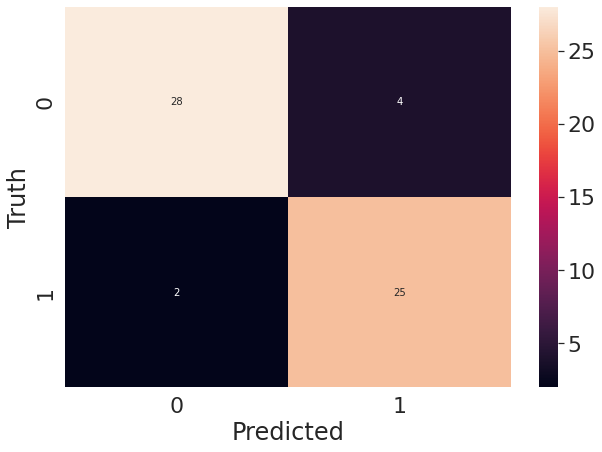

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig("CM_"+model_name+str(components)+'.png')


In [ ]:
#Precision,recall,f1_score,cohen_kappa_score,auc.......
print("Precision,recall,f1 score,cohen kappa score,auc.....")
print(" ")

# precision tp / (tp + fp)
precision = precision_score(y_test, y_predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_predicted)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test,  y_predicted)
print('ROC AUC: %f' % auc)
#Cohen's kappa
kappa=cohen_kappa_score(y_test,  y_predicted)
print('Cohen Kappa: %f' % kappa)
print(" ")



Precision,recall,f1 score,cohen kappa score,auc.....
 
Precision: 0.888889
Recall: 0.888889
F1 score: 0.888889
ROC AUC: 0.897569
Cohen Kappa: 0.795139
 


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('VarScore:',metrics.explained_variance_score(y_test,y_predicted))

MAE: 0.1016949152542373
MSE: 0.1016949152542373
RMSE: 0.31889640207164033
VarScore: 0.5902777777777778
